In [1]:
import pandas as pd
import glob
import numpy as np

# gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from tqdm import tqdm

In [2]:
from gensim.models import LdaModel
import pickle as pkl
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load raw corpus dataframe
with open('corpus_raw.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# load cleaned corpus
with open('corpus_hiddenstories.pkl', 'rb') as f:
    corpus = pkl.load(f)[0]

In [4]:
# load model
fname = 'ldamodel_output_hiddenstories'
lda_model = LdaModel.load(fname)

In [5]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def clamp(x): 
  return max(0, min(x, 255))

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(17):
    fig = plt.figure(figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
    r, g, b = tableau20[i]  
    cols[i] = "#{0:02x}{1:02x}{2:02x}".format(clamp(r), clamp(g), clamp(b))

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: tableau20[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,num_topics=17)

fig, axes = plt.subplots(3, 6, figsize=(100,100), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500, )
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=5))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

NameError: name 'stop_words' is not defined

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

<Figure size 480x240 with 0 Axes>

In [ ]:
# run the model
doc_lda = lda_model[corpus]

In [ ]:
# grab the topic probabilities for each paper

# init storage
hm = np.zeros([len(corpus), lda_model.num_topics])

# loop over papers
for paper in tqdm(range(len(corpus))):
    pairs = lda_model[corpus[paper]][0]
    for pair in pairs:
        hm[paper, pair[0]] = pair[1]

In [ ]:
# # normalize the topic distribution for each paper
# hm_norm = hm / np.expand_dims(np.sum(hm, axis=1), -1)

In [25]:
# create time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
popularity_all_journals = np.zeros([len(years), lda_model.num_topics])

# loop through years
y = -1
for year in years:
    y = y+1
    
    # extract all papers in this year
    hm_year = hm[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [26]:
# define plotting colors
import matplotlib.colors as mcolors

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# colorz=[color for name, color in mcolors.TABLEAU_COLORS.items()]

# define topic names
labels = ['Precipitation Extremes & Distributions',
          'Climate Change',
          'River Networks, Topography, & Scaling',
          'Hydrogeology',
          'Forecasting',
          'Energy Balance (Hydrometeorology, Land Surface)',
          'Snow and Ice',
          'Sediment & Erosion',
          'Water Resources Management',
          'Hydrogeomorphology',
          'Uncertainty and Calibration',
          'Statistical Hydrology',
          'Quality & Transport',
          'Miscellaneous',
          'Soil Moisture',
          'Floods and Discharge',
          'Precipitation Trends & Climatology']

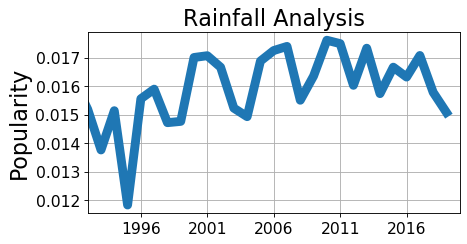

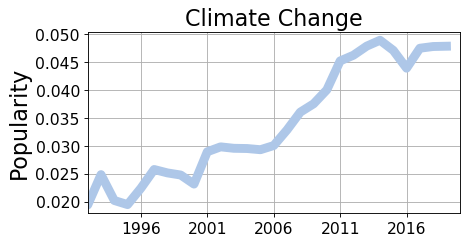

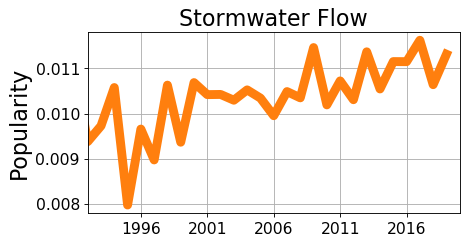

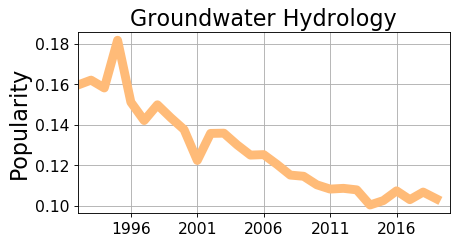

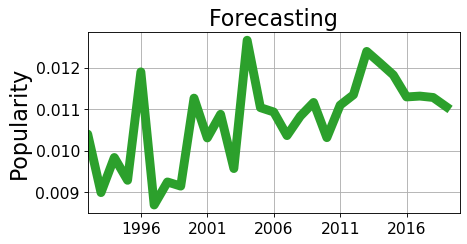

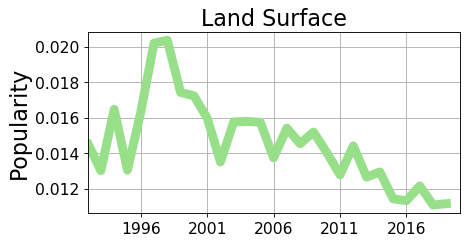

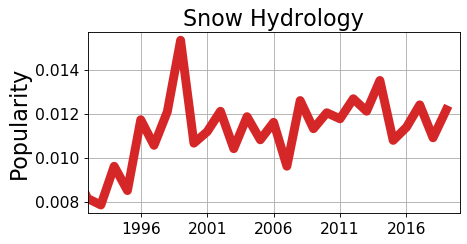

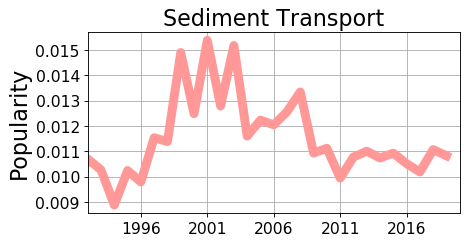

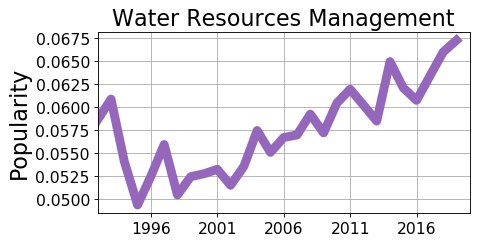

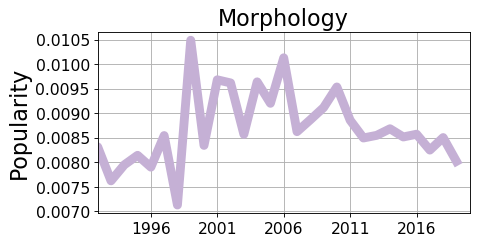

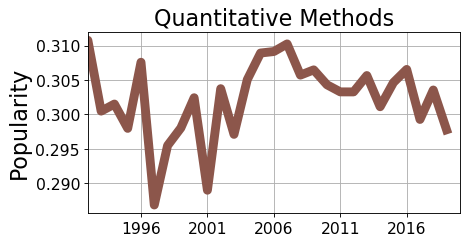

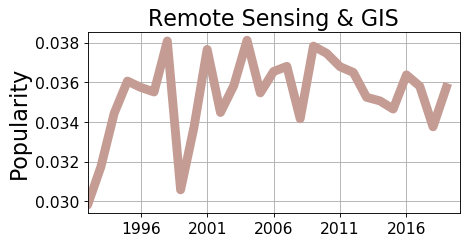

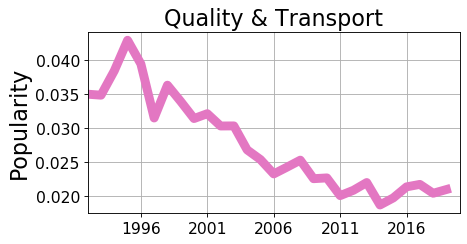

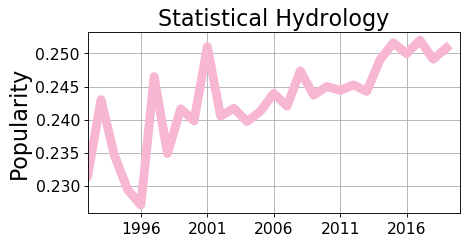

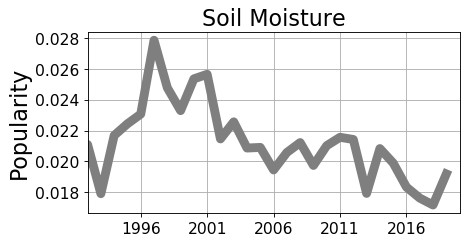

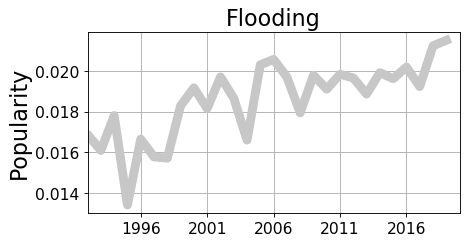

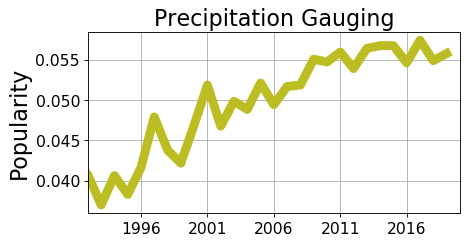

In [27]:
# plot individual time series

# plot individual time series
for i in range(lda_model.num_topics):
    fig = plt.figure(figsize=(6,3), dpi=80, facecolor='w', edgecolor='k')
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], color = pltcolor, linewidth=8, label=labels[i])
    ymax = np.max(popularity_all_journals[1:,i])
    ymin = np.min(popularity_all_journals[1:,i])
    plt.xlim([1,29])
    plt.ylim([ymin-0.05*(ymax-ymin), ymax+0.05*(ymax-ymin)])
    plt.title(f'{labels[i]}', fontsize=20)
    plt.xticks(years[5::5], fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel('Year of Publication', fontsize=20)
    plt.ylabel('Popularity', fontsize=20)
    plt.grid()
#     plt.savefig(f'figures/individual_topic_{i}.png')
    plt.show()

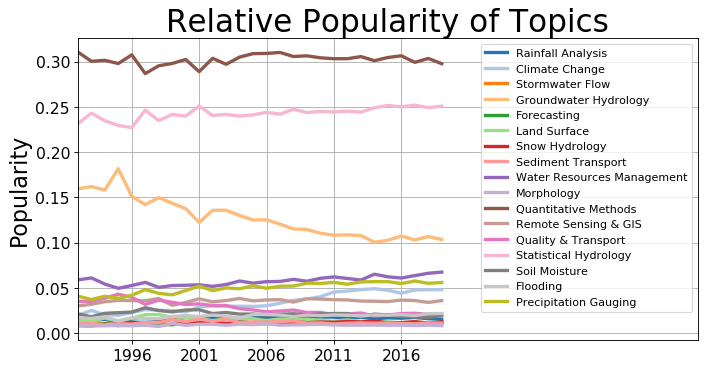

In [28]:
# plot relative time series
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for i in range(lda_model.num_topics):
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], 
             color = pltcolor, linewidth=3, label=labels[i])
plt.xlim([1,47])
plt.xticks(years[5::5], fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('Year of Publication', fontsize=20)
plt.legend()
plt.ylabel('Popularity', fontsize=20)
plt.title('Relative Popularity of Topics', fontsize=28)
plt.grid()
# plt.savefig(f'figures/all_topics_timeseries_{i}.png')
plt.show()